<a href="https://colab.research.google.com/github/Jose-Luis25/EstadisticaVerano/blob/main/ProblemarioU4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [5]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [8]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols("tiempo ~ C(metodo)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(metodo),3.0,69.5,23.166667,9.423729,0.001771
Residual,12.0,29.5,2.458333,NaN,NaN


In [9]:
from scipy.stats import shapiro
_,valor_p_sh=shapiro(modelo_lineal.resid)
print("valor_p_shapiro=", valor_p_sh)
#H0:Normalidad
#H1:No hay Normalidad
#Nivel de significancia=0.05
#No se rechaza la H0 ya que es mayor que el nivel de significancia

valor_p_shapiro= 0.2808008139238357


In [19]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['tiempo']
grupo2 = df[df['metodo'] == 'B']['tiempo']
grupo3 = df[df['metodo'] == 'C']['tiempo']
grupo4 = df[df['metodo'] == 'D']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#Test Levene
#H0:Homoscedasticidad (Varianzas iguales)
#H1: Heterocedasticidad (Varianzas direfentes)
#Nivle de significancia: 0.05
#valor_p_levene:0.44
#Se acepta la H0 ya que el valor p es mayor que el Nivel de Sig.

p-valor de Levene: 0.4485146502776487


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

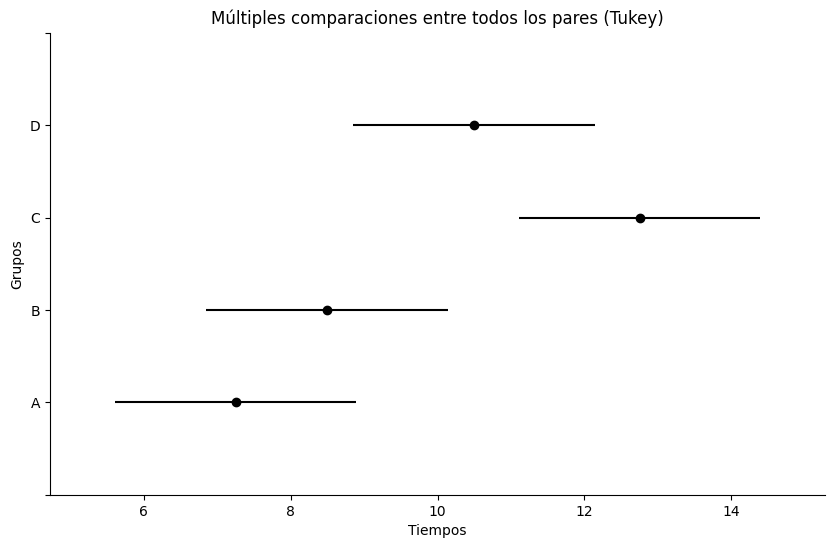

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Tiempos")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |
